In [4]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import random


In [5]:
def euclidean_distance(point1, point2):
    return np.linalg.norm(point1 - point2)


def calc_avg(Ci, d):
    sum1 = np.zeros((1, d))
    size = len(Ci)

    for x in Ci:
        sum1 += x

    for i in range(d):
        sum1[0][i] = sum1[0][i] / size

    return sum1


# generate 2D data of N points using sklearn
def generate_data(N=1000):
    X, y = make_blobs(n_samples=N, centers=3, n_features=2, random_state=1)
    plt.scatter(X[:, 0], X[:, 1])
    plt.title("1000 points in 2D")
    plt.show()
    return X


def run_Kmeans(k):
    X = generate_data()
    kmeans = Kmeans(k)
    labels = kmeans.fit(X)
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.show()


def run_pdc_dp_means(l):
    X = generate_data()
    pdc_dp_means = PDCDPmeans(l)
    labels = pdc_dp_means.fit(X)
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.show()

In [6]:
class Kmeans:
    def __init__(self, k, max_iter=100):
        self.k = k
        self.max_iter = max_iter
        self.centroids = None
        self.clusters = None
        self.assignments = None
        self.m = None
        self.d = None

    def fit(self, X):
        """Train the K-Means algorithm on the data X"""
        self.m, self.d = X.shape
        self.centroids = self._init_centroids(X)
        self.assignments = [-1 for _ in range(self.m)]

        for i in range(self.max_iter):
            self.clusters = self._create_clusters(X)
            old_centroids = self.centroids
            self.centroids = self._calculate_centroids(X)
            if self._is_converged(old_centroids):
                break
        return self.assignments

    def _init_centroids(self, X):
        """Initialize the centroids as k random samples from X"""
        return [X[random.randint(0, self.m - 1)] for _ in range(self.k)]

    def _create_clusters(self, X):
        """Assign the samples to the closest centroids to create clusters"""
        clusters = [[] for _ in range(self.k)]
        for idx, sample in enumerate(X):
            centroid_idx = self._closest_centroid(sample)
            self.assignments[idx] = centroid_idx
            clusters[centroid_idx].append(sample)
        return clusters

    def _closest_centroid(self, sample):
        """Return the index of the closest centroid to the sample"""
        distances = [euclidean_distance(sample, point) for point in self.centroids]
        closest_idx = np.argmin(distances)
        return closest_idx

    def _calculate_centroids(self, X):
        """Calculate the new centroids as the means of the samples in each cluster, if the cluster is empty,
        choose a random sample from X"""
        return [np.mean(cluster, axis=0) if len(cluster) != 0 else X[np.random.randint(self.m - 1)] for cluster in
                self.clusters]

    def _is_converged(self, old_centroids):
        """Check if the centroids have changed"""
        return np.array_equal(old_centroids, self.centroids)

In [7]:
class PDCDPmeans(Kmeans):
    def __init__(self, l, max_iter=100):
        super().__init__(k=None, max_iter=max_iter)
        self.l = l
        self.j_max = None
        self.d_max = None

    def fit(self, X):
        """Train the K-Means algorithm on the data X"""
        self.m, self.d = X.shape

        self.k = 1
        self.centroids = self._init_centroid(X)
        self.assignments = [0 for _ in range(self.m)]

        for i in range(self.max_iter):
            self.j_max, self.d_max = self.farthest_point(X)
            if not self.split_if_needed(X):
                break
            self.clusters = self._create_clusters(X)
            old_centroids = self.centroids
            self.centroids = self._calculate_centroids(X)
            if self._is_converged(old_centroids):
                break
        return self.assignments

    def _init_centroid(self, X):
        """Initialize the centroid as mean of samples from X"""
        return [np.mean(X, axis=0)]

    def farthest_point(self, X):
        """Return the index, distance of the farthest point from its corresponding centroid"""
        distances = [euclidean_distance(x, self.centroids[self.assignments[idx]]) for idx, x in enumerate(X)]
        farthest_idx = np.argmax(distances)
        return farthest_idx, distances[farthest_idx]

    def split_if_needed(self, X):
        """Split the cluster if the farthest point is farther than l"""
        if self.d_max > self.l:
            self.k += 1
            self.centroids.append(X[self.j_max])
            self.assignments[self.j_max] = self.k
            return True
        return False


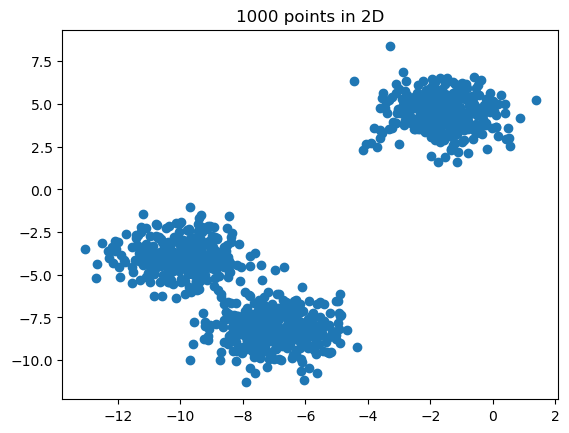

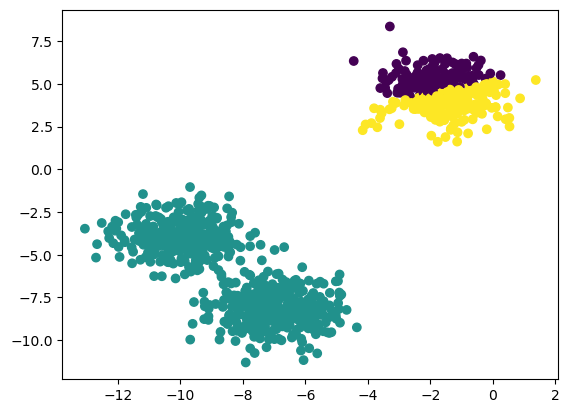

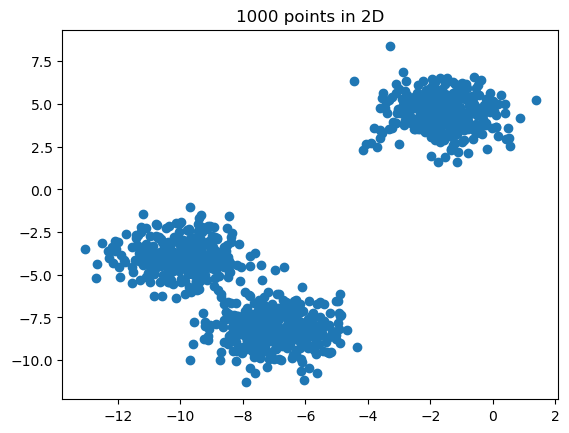

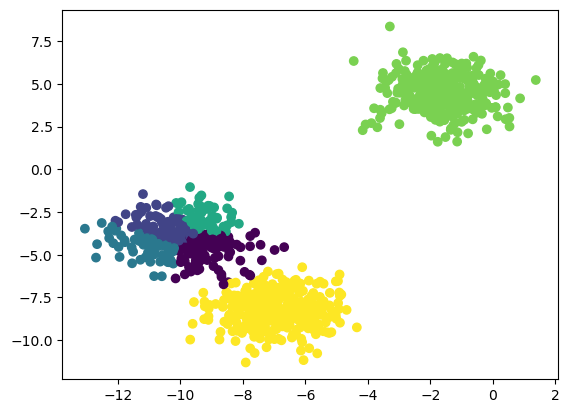

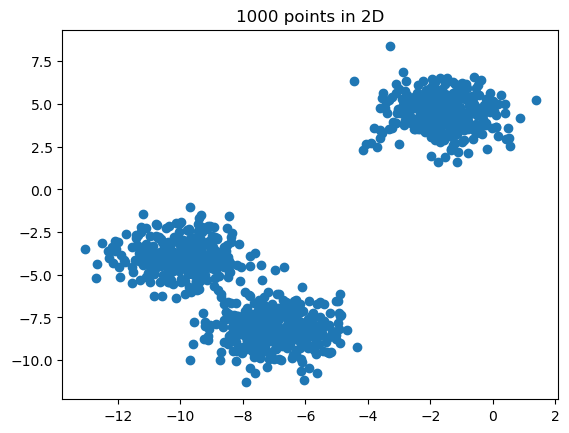

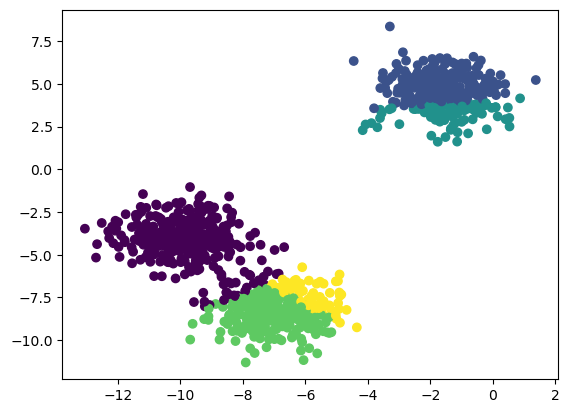

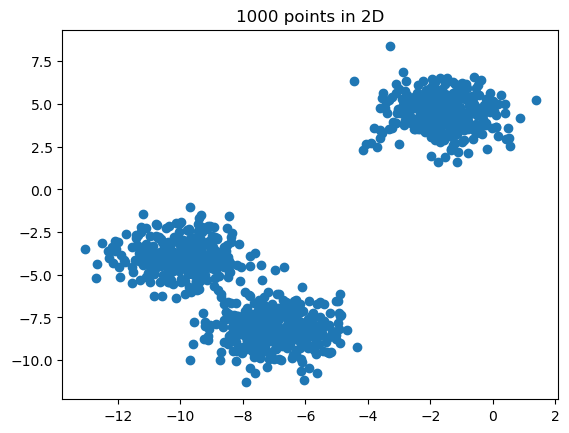

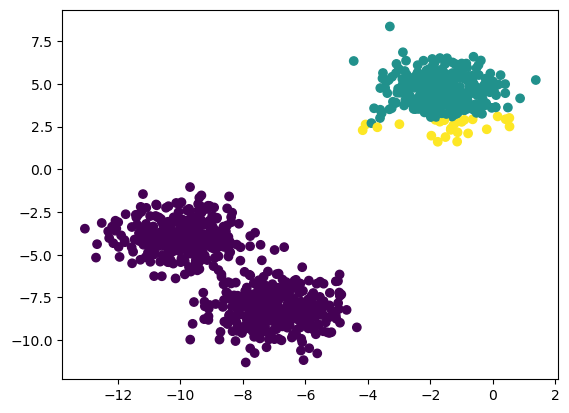

In [8]:
def main():
    run_Kmeans(k=3)
    run_Kmeans(k=6)
    run_pdc_dp_means(l=4)
    run_pdc_dp_means(l=6)


if __name__ == "__main__":
    main()